# Data Analysis on Heart Disease

## Introduction
Heart diseases are one of the leading causes of death in the world including the United States for many years. With the increasing rate of cases for heart diseases worldwide, it is important to focus at the leading causes of this disease and establish a relationship between these vicious disease. As a base for our analysis we are going to use the heart disease dataset available at Kaggle. 
(https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset/data)

This is the cleaned version of the data set given in Canvas -> group_project_proposal


The dataset originates from 1988 and evaluates data from four different databases: Cleveland, Hungary, Switzerland and Long Beach V. While the dataset does have 76 distinct attributes, it only utilizes 14 of them. In our group project, we chose to focus on the variables age, resting blood pressure, cholesterol, and  maximum heart rate and compere it to the diagnosis of heart disease. We chose this variables since according to National Center for Chronic Disease Prevention and Health Promotion (NCCDPHP) it is considered one of the leading reason of causing the heart disease. We will be comparing the numerical variables by the categorical variables (2 cases) “0” and “1” which shows the diagnosis of heart diseases. 

From thee following informations, we will be attempting to answer the following predictive question. 

**Predictive question:**
How does the amount of cholesterol, type of heart defect, age, and sex help us predict the diagnosis of heart disease?

We will be conducting a KNN classification in order to answer the predictive question.

In [1]:
### Run this cell before continuing.
install.packages("kknn")
library(kknn)
library(repr)
library(tidyverse)
library(tidymodels)
library(dplyr)
library(ggplot2)
options(repr.matrix.max.rows = 10)
library(gridExtra)

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.4.2     ✔ purrr   1.0.1
✔ tibble  3.2.1     ✔ dplyr   1.1.1
✔ tidyr   1.3.0     ✔ stringr 1.5.0
✔ readr   2.1.3     ✔ forcats 0.5.2
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.2     ✔ rsample      1.1.1
✔ dials        1.1.0     ✔ tune         1.0.1
✔ infer        1.0.4     ✔ workflows    1.1.2
✔ modeldata    1.0.1     ✔ workflowsets 1.0.0
✔ parsnip      1.0.3     ✔ yardstick    1.1.0
✔ recipes      1.0.4     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks strin

ERROR: Error in library(gridExtra): there is no package called ‘gridExtra’


### Reading the Data

First read the raw data from GitHub that we uploaded.

In [2]:
heart_disease_data <- read_csv("https://raw.githubusercontent.com/yma24ma/dsci_009_43_gp/main/heart.csv")
heart_disease_data

Rows: 1025 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (14): age, sex, cp, trestbps, chol, fbs, restecg, thalach, exang, oldpea...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


age sex cp trestbps chol fbs restecg thalach exang oldpeak slope ca thal
1    52  1   0  125      212  0   1       168     0     1.0     2     2  3   
2    53  1   0  140      203  1   0       155     1     3.1     0     0  3   
3    70  1   0  145      174  0   1       125     1     2.6     0     0  3   
4    61  1   0  148      203  0   1       161     0     0.0     2     1  3   
5    62  0   0  138      294  1   1       106     0     1.9     1     3  2   
⋮    ⋮   ⋮   ⋮  ⋮        ⋮    ⋮   ⋮       ⋮       ⋮     ⋮       ⋮     ⋮  ⋮   
1021 59  1   1  140      221  0   1       164     1     0.0     2     0  2   
1022 60  1   0  125      258  0   0       141     1     2.8     1     1  3   
1023 47  1   0  110      275  0   0       118     1     1.0     1     1  2   
1024 50  0   0  110      254  0   0       159     0     0.0     2     0  2   
1025 54  1   0  120      188  0   1       113     0     1.4     1     1  3   
     target
1    0     
2    0     
3    0     
4    0     
5    0     
⋮    ⋮     
1021 1     
1022 0     
1023 0     
1024 1     
1025 0

**Variables**

age: Age

sex: Sex

cp: Chest pain type (4 values)

trestbps: resting blood pressure

chol: serum cholestoral in mg/dl

fbs: fasting blood sugar > 120 mg/dl

restecg: resting electrocardiographic results (values 0,1,2)

thalacg: maximum heart rate achieved

exang: exercise induced angina

oldpeak: ST depression induced by exercise relative to rest

slope: the slope of the peak exercise ST segment

ca: number of major vessels (0-3) colored by flourosopy

thal: 0 = normal; 1 = fixed defect; 2 = reversable defect

target: diagnosis of heart disease

**Select Data**

We will now be using the `select()` function to select the row that we will be using in this analysis and make it into one table.

In [3]:
heart_disease_selected <- select(heart_disease_data, age, chol, target, thalach, trestbps)|>
                          mutate(target=as_factor(target))|>
                          mutate(heart_disease=fct_recode(target, "Yes" = "1", "No " = "0"))
heart_disease_selected

age chol target thalach trestbps heart_disease
1    52  212  0      168     125      No           
2    53  203  0      155     140      No           
3    70  174  0      125     145      No           
4    61  203  0      161     148      No           
5    62  294  0      106     138      No           
⋮    ⋮   ⋮    ⋮      ⋮       ⋮        ⋮            
1021 59  221  1      164     140      Yes          
1022 60  258  0      141     125      No           
1023 47  275  0      118     110      No           
1024 50  254  1      159     110      Yes          
1025 54  188  0      113     120      No

We use the sum function to check if there are any NA values in our data tables

In [4]:
sum(is.na(heart_disease_selected))

[1] 0

**Average of Selected**

In [5]:
hd_average1 <- heart_disease_selected |>
                map(mean) 
hd_average1

Warning message in mean.default(.x[[i]], ...):
“argument is not numeric or logical: returning NA”
Warning message in mean.default(.x[[i]], ...):
“argument is not numeric or logical: returning NA”


$age
[1] 54.43415

$chol
[1] 246

$target
[1] NA

$thalach
[1] 149.1141

$trestbps
[1] 131.6117

$heart_disease
[1] NA

## Visualization
Now we will visualize the relationship between each numerical variable vs the heart disease.

**Age vs Cholesterol**

Now, we will visualize the relationship between the age and the cholesterol. First, we will be using `select` function to create a table.

In [6]:
hd_select_chol <- select(heart_disease_selected,age,chol,heart_disease)|>
               mutate(heart_disease)
hd_select_chol

age chol heart_disease
1    52  212  No           
2    53  203  No           
3    70  174  No           
4    61  203  No           
5    62  294  No           
⋮    ⋮   ⋮    ⋮            
1021 59  221  Yes          
1022 60  258  No           
1023 47  275  No           
1024 50  254  Yes          
1025 54  188  No

**Age vs Cholesterol**

Now, we will visualize the correlation between `age` and `chol` (the number of cholesterol) and whether there is any relationship with the diagnosis of heart disease. We will be using `ggplot` to create a scatter plot using `geom_point` in order to visualize the relationship between those two variables. We will be using the `alpha` value of 0.3 in order to visualize any overlapping points and have a density visualization.
Hypothesis: We think that the patient with a higher age will have a higher cholesterol which will cause to have a higher rate of heart disease. 

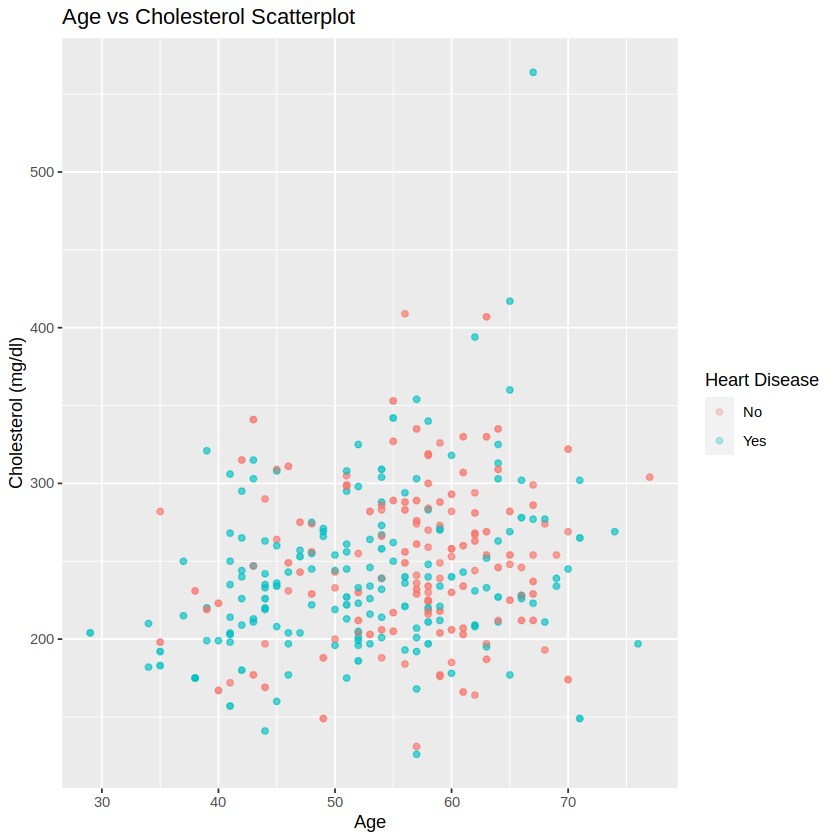

In [7]:
hd_chol_plot <- ggplot(hd_select_chol,aes(x = age, y = chol,colour = heart_disease)) +
                    geom_point(alpha = 0.3) +
                    labs(x = "Age", y = "Cholesterol (mg/dl)", colour = "Heart Disease") +       
                    ggtitle("Age vs Cholesterol Scatterplot")
hd_chol_plot   

**Analysis**

By looking at the scatter plot above, it seems like there is a weak to no correlation between those two variables (age and the number of cholesterols) However, it has a slight tendency that the red dots which represent no heart disease are on the right side of the scatter plot, which means that the higher the age is, there are fewer people that are diagnosed with heart disease. This scatter plot has surprised us to some degree since we initially hypothesized that the higher the age is, the higher the cholesterol will be, and so as the number of patients diagnosed with heart disease. 

In [8]:
hd_select_thalach <- select(heart_disease_selected,age,thalach,heart_disease)|>
                  mutate(heart_disease)
hd_select_thalach

age thalach heart_disease
1    52  168     No           
2    53  155     No           
3    70  125     No           
4    61  161     No           
5    62  106     No           
⋮    ⋮   ⋮       ⋮            
1021 59  164     Yes          
1022 60  141     No           
1023 47  118     No           
1024 50  159     Yes          
1025 54  113     No

**Age vs Max Heart Rate**

Now we will be using `age` and `thalach` to visualize the correlation between the Age and the Maximum Heart Rate achieved by the patient, and if they have any effect on the diagnosis of the heart disease. 

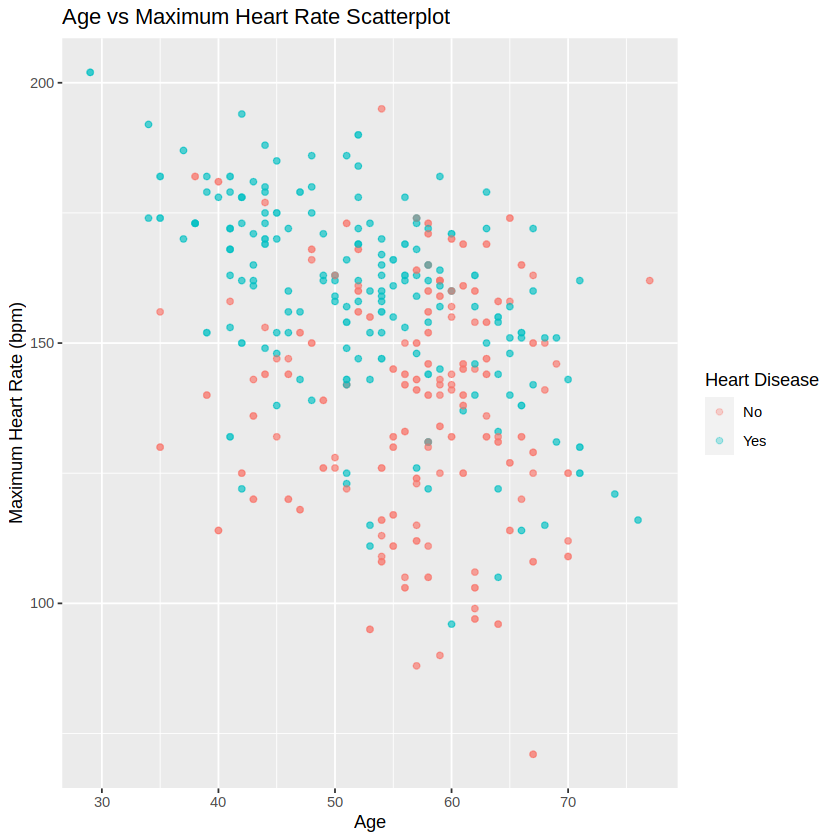

In [9]:
hd_thalach_plot <- ggplot(hd_select_thalach,aes(x = age, y = thalach, colour = heart_disease)) +
                       geom_point(alpha = 0.3)+
                       labs(x = "Age", y= "Maximum Heart Rate (bpm)", colour = "Heart Disease") +       
                       ggtitle("Age vs Maximum Heart Rate Scatterplot")
hd_thalach_plot   

**Analysis**

From the scatter plot above, it is clear that it has a weak negative correlation between the age and the maximum heart rate achieved. This was according to our hypothesis that the younger the age, the higher the maximum heart rate. This hypothesis was based on our research that it said to derive the maximum heart rate, minus the age from 220. (Centers for Disease Control and Prevention) 
Also, there is a tendency for patients with higher maximum heart rates tend to have a higher rate of heart disease. 

In [10]:
hd_select_trestbps <- select(heart_disease_selected,age,trestbps,heart_disease)|>
                   mutate(heart_disease)
hd_select_trestbps

age trestbps heart_disease
1    52  125      No           
2    53  140      No           
3    70  145      No           
4    61  148      No           
5    62  138      No           
⋮    ⋮   ⋮        ⋮            
1021 59  140      Yes          
1022 60  125      No           
1023 47  110      No           
1024 50  110      Yes          
1025 54  120      No

**Age vs Resting Blood Pressure**

Now we will be using `age` and `trestbps` to visualize the correlation between the Age and the Resting Blood Pressure achieved by the patient, and if they have any effect on the diagnosis of the heart disease. 
Hypothesis: We think that elder patients will have a higher resting blood pressure which causes them to have a higher number of positive heart disease diagnoses. 

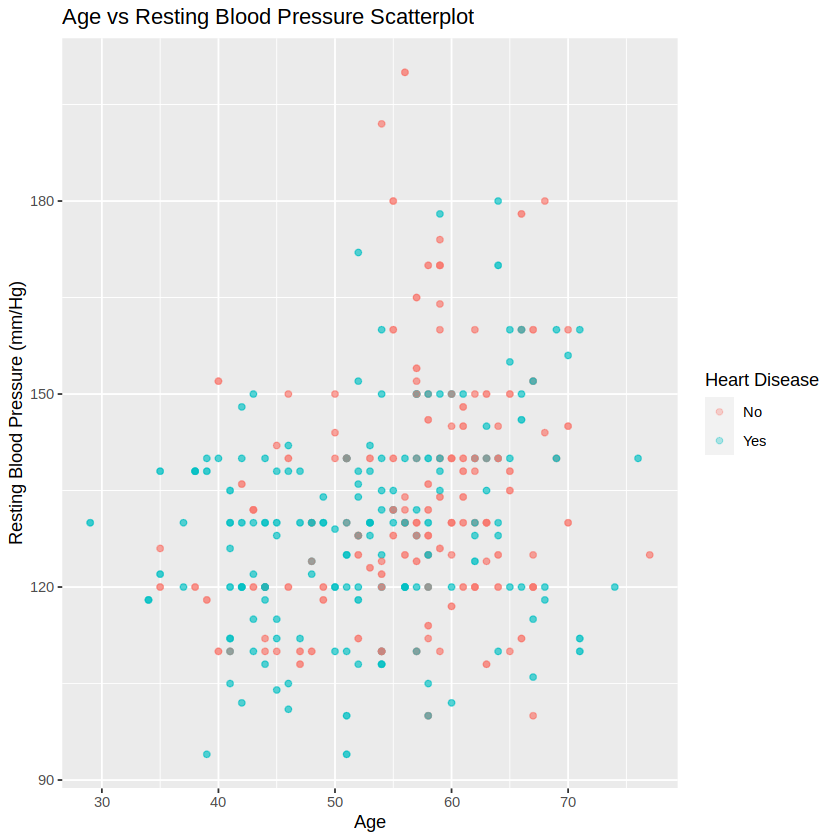

In [11]:
hd_trestbps_plot <- ggplot(hd_select_trestbps,aes(x = age, y = trestbps, colour = heart_disease)) +
                        geom_point(alpha = 0.3) +
                        labs(x = "Age", y = "Resting Blood Pressure (mm/Hg)", colour = "Heart Disease") +       
                        ggtitle("Age vs Resting Blood Pressure Scatterplot")
hd_trestbps_plot   

**Analysis**

According to our scatter plot above, there is almost no correlation between the age and the resting blood pressure as well as the diagnosis of heart disease.

## Methods
For our Heart Disease data set, we are going to use the method of K-nearest neighbors classification. Essentially, we are going to use predictor variables chol (amount of cholesterol), thal (type of heart defect), age and sex to predict the diagnosis class of heart disease, which can be categorized into 0 (no heart disease) or 1 (heart disease). Therefore, the column names we will incorporate are chol, thal, age, sex and target. We chose to only use four predictor variables because we think that there are more than two factors that contribute to the diagnosis of heart disease. Since there are multivariables, we can avoid a 4D graph by using the facet_grid function to create a plot that has multiple subplots arranged in a grid.

## Expected outcomes and significance


What do you expect to find?

We expect to identify the most relevant features that contribute to the presence or absence of heart disease.We also look for patterns and correlations within the data.

What impact could such findings have?

Understanding the factors that contribute to heart disease can inform public health initiatives.Furthermore, discoveries from this dataset can enhance healthcare by improving diagnostic tools and predictive models for heart disease, potentially leading to early detection and treatment.

What future questions could this lead to?

Are there additional attributes that should be considered, or are there redundant variables that can be eliminated to improve model performance?



By looking at the three scatter plots above, it looks like the scaling and the centering of the data worked by looking at the axis where the value 0 for both the x-axis and y-axis generally goes through the center of the scatter plot. 
As a result, the dataset has been standardized, allowing for meaningful comparisons between variables, and enabling the application of KNN classification.

In [ ]:
split_set <- initial_split(heart_disease_selected, prop = 0.75, strata =heart_disease)  
training_set <- training(split_set)   
testing_set <- testing(split_set)
testing_set
training_set

**Scaling and Centering Data**

Now, we will be creating a recipe by scaling and centering the dataset using `step_scale` and `step_center`. Scaling and centering the dataset will allow us to compare variables to each other by setting the mean to 0 and the standard deviation to 1. This additional step will simplify interpretation when comparing each variables and allow us to conduct a KNN classification.

In [14]:
set.seed(9999) 
heart_disease_recipe <- recipe(heart_disease ~ age + chol + thalach + trestbps, data = heart_disease_selected) |>
                        step_scale(all_predictors()) |>
                        step_center(all_predictors())
heart_disease_recipe
                        
heart_disease_scaled <- heart_disease_recipe |>
prep() |> 
bake(heart_disease_selected)
heart_disease_scaled

Recipe

Inputs:

      role #variables
   outcome          1
 predictor          4

Operations:

Scaling for all_predictors()
Centering for all_predictors()

age         chol       thalach    trestbps   heart_disease
1    -0.2683056  -0.6590104  0.8209198 -0.3774513 No           
2    -0.1580799  -0.8334543  0.2558430  0.4788735 No           
3     1.7157579  -1.3955514 -1.0481803  0.7643151 No           
4     0.7237261  -0.8334543  0.5166477  0.9355801 No           
5     0.8339519   0.9303676 -1.8740617  0.3646969 No           
⋮    ⋮           ⋮          ⋮          ⋮          ⋮            
1021  0.50327465 -0.4845665  0.6470500  0.4788735 Yes          
1022  0.61350040  0.2325919 -0.3527012 -0.3774513 No           
1023 -0.81943436  0.5620971 -1.3524524 -1.2337761 No           
1024 -0.48875711  0.1550613  0.4297128 -1.2337761 Yes          
1025 -0.04785411 -1.1241942 -1.5697896 -0.6628929 No

**Visualize Scaled/Centered Data**

Now, we will visualize the scaled/centered data into a scatter plot using `ggplot`. 

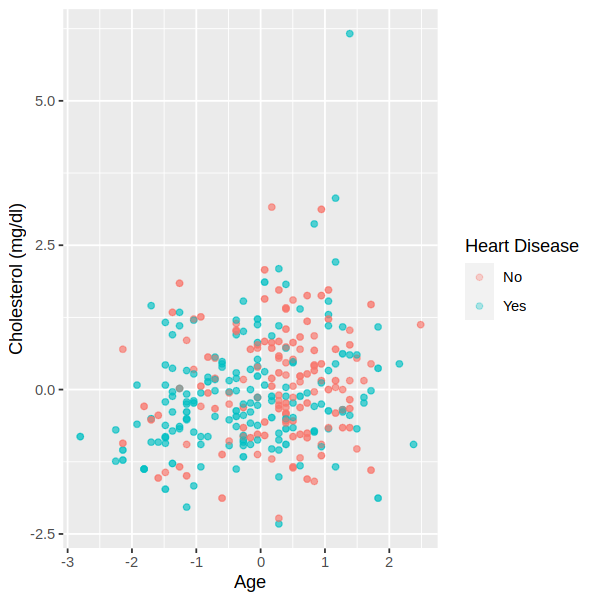

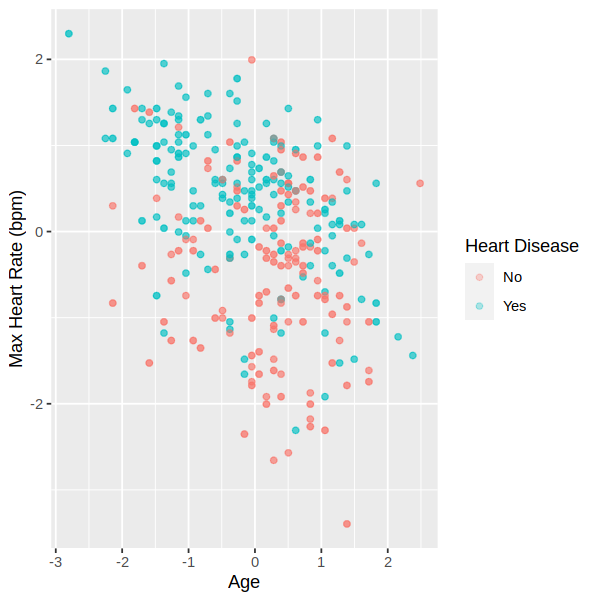

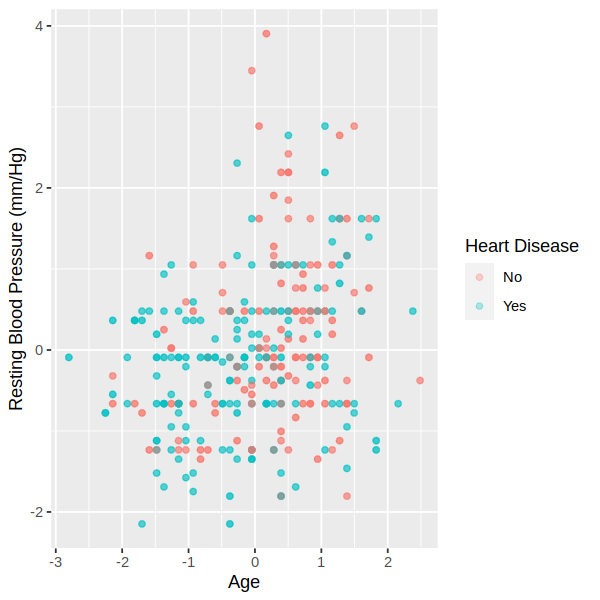

In [15]:
options(repr.plot.width = 5, repr.plot.height = 5)


hd_chol_scaled_plot <- ggplot(heart_disease_scaled, aes(x = age, y = chol, color = heart_disease)) +
geom_point(alpha = 0.3) +
labs(x = "Age", y = "Cholesterol (mg/dl)", colour = "Heart Disease")
hd_chol_scaled_plot

hd_maxheart_scaled_plot <- ggplot(heart_disease_scaled, aes(x = age, y = thalach, color = heart_disease)) +
geom_point(alpha = 0.3) +
labs(x = "Age", y = "Max Heart Rate (bpm)", colour = "Heart Disease")
hd_maxheart_scaled_plot

hd_trestbps_scaled_plot <- ggplot(heart_disease_scaled, aes(x = age, y = trestbps, color = heart_disease)) +
geom_point(alpha = 0.3) +
labs(x = "Age", y = "Resting Blood Pressure (mm/Hg)", colour = "Heart Disease")
hd_trestbps_scaled_plot

By looking at the three scatter plots above, it looks like the scaling and the centering of the data worked by looking at the axis where the value 0 for both the x-axis and y-axis generally goes through the center of the scatter plot. 
As a result, the dataset has been standardized, allowing for meaningful comparisons between variables, and enabling the application of KNN classification.

In [ ]:
options(repr.plot.height = 5, repr.plot.width = 6)

knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
            set_engine("kknn") |>
            set_mode("classification")

mnist_recipe  <- recipe(heart_disease ~ age + chol + thalach + trestbps , data = training_set) |>
   step_scale(all_predictors()) |>
   step_center(all_predictors())


mnist_vfold <- vfold_cv(training_set, v = 5, strata = heart_disease)

knn_results <- workflow() |>
                 add_recipe(mnist_recipe) |>
                 add_model(knn_spec) |>
                 tune_grid(resamples = mnist_vfold, grid = tibble(neighbors = c(2,3,4,5,6))) |>
                 collect_metrics()

accuracies <- knn_results |>
                 filter(.metric == 'accuracy')

cross_val_plot <- ggplot(accuracies, aes(x = neighbors, y = mean)) +
                  geom_point() +
                  geom_line() +
                  labs(x = 'Neighbors', y = 'Accuracy Estimate') +
                  theme(text = element_text(size = 20)) +
                  scale_x_continuous(breaks = seq(0, 20, 2)) +
                  scale_y_continuous(limits = c(0.7, 0.85))

cross_val_plot

In [ ]:
mnist_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = 4) |>
       set_engine("kknn") |>
       set_mode("classification")

mnist_fit <- workflow() |>
             add_recipe(mnist_recipe) |>
             add_model(mnist_spec) |>
            fit(data = training_set)
mnist_fit

In [ ]:
mnist_predictions <- predict(mnist_fit ,testing_set) |>
      bind_cols(testing_set)

predictions_boolean <-  mnist_predictions |>
                        mutate(.pred_class = ifelse(.pred_class == heart_disease, TRUE, FALSE))
predictions_boolean

In [ ]:
options(repr.plot.height = 5, repr.plot.width = 10)

hd_chol_predict_plot <- ggplot (predictions_boolean, aes (x = age, y = chol, color = .pred_class)) +
                                geom_point(alpha = 0.3) +
                                labs(x = "Age", y = "Cholesterol (mg/dl)", colour = "Predictions", title = "Predictions Plot" )
hd_maxheart_predict_plot <- ggplot(predictions_boolean, aes(x = age, y = thalach, color = .pred_class)) +
                                geom_point(alpha = 0.3) +
                                labs(x = "Age", y = "Max Heart Rate (bpm)", color = "Predictions", title = "Predictions Plot")
hd_trestbps_predict_plot <- ggplot(predictions_boolean, aes (x = age, y = trestbps, color = .pred_class)) +
                                geom_point(alpha = 0.3) +
                                labs(x = "Age", y = "Resting Bloode Pressure (mm/hg)", title = "Predictions Plot")




grid.arrange(hd_chol_scaled_plot, hd_chol_predict_plot, ncol=2)
grid.arrange(hd_maxheart_scaled_plot, hd_maxheart_predict_plot, ncol=2)
grid.arrange(hd_trestbps_scaled_plot, hd_trestbps_predict_plot, ncol = 2)

In [ ]:
prediction_accuracy <- mnist_predictions |>
        metrics(truth = heart_disease, estimate = .pred_class)             

prediction_accuracy

In [ ]:
set.seed(9999) 

mnist_metrics <- mnist_predictions |>
  metrics(truth = heart_disease,estimate = .pred_class) |>
filter(.metric=="accuracy")

mnist_conf_mat <- mnist_predictions |>
  conf_mat(truth = heart_disease, estimate = .pred_class)


mnist_metrics
mnist_conf_mat